In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from citipy import citipy

api_key = "4b31e95c2e5628630386cdbc57046509"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key

In [4]:
number = 1

name = []
city_code = []
lat = []
lng = []
temp = []
humid = []
clouds = []
wind = []

print('------------------------------')

for city in cities:
    try:
        city_data = (requests.get(url + '&q=' + city)).json()
        name.append(city_data['name'])
        city_code.append(city_data['id'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])
        print(f'Processing {number} of {len(cities)} complete. | Added {city}')
        number = number + 1
    
    except KeyError:
        print(f'Skipping {number} of {len(cities)}. | Skipping {city}')
        number = number + 1
        
print('------------------------------')

------------------------------
Processing 1 of 623 complete. | Added kapaa
Processing 2 of 623 complete. | Added hermanus
Processing 3 of 623 complete. | Added brigantine
Processing 4 of 623 complete. | Added brae
Processing 5 of 623 complete. | Added upernavik
Processing 6 of 623 complete. | Added khatanga
Processing 7 of 623 complete. | Added litein
Processing 8 of 623 complete. | Added akureyri
Processing 9 of 623 complete. | Added rikitea
Skipping 10 of 623. | Skipping ust-kamchatsk
Processing 11 of 623 complete. | Added jacareacanga
Processing 12 of 623 complete. | Added longyearbyen
Skipping 13 of 623. | Skipping taolanaro
Processing 14 of 623 complete. | Added hami
Processing 15 of 623 complete. | Added lensk
Processing 16 of 623 complete. | Added punta arenas
Processing 17 of 623 complete. | Added tuktoyaktuk
Processing 18 of 623 complete. | Added igarka
Processing 19 of 623 complete. | Added anadyr
Processing 20 of 623 complete. | Added thompson
Processing 21 of 623 complete. 

Processing 174 of 623 complete. | Added kieta
Processing 175 of 623 complete. | Added neuenhagen
Processing 176 of 623 complete. | Added gazanjyk
Processing 177 of 623 complete. | Added salalah
Processing 178 of 623 complete. | Added lavrentiya
Processing 179 of 623 complete. | Added pokhara
Processing 180 of 623 complete. | Added san andres
Processing 181 of 623 complete. | Added ancud
Processing 182 of 623 complete. | Added kavieng
Processing 183 of 623 complete. | Added tiksi
Processing 184 of 623 complete. | Added rocha
Processing 185 of 623 complete. | Added san policarpo
Processing 186 of 623 complete. | Added sao joao da barra
Processing 187 of 623 complete. | Added eureka
Processing 188 of 623 complete. | Added sao lourenco do sul
Processing 189 of 623 complete. | Added rayong
Processing 190 of 623 complete. | Added voh
Skipping 191 of 623. | Skipping andenes
Processing 192 of 623 complete. | Added yerbogachen
Skipping 193 of 623. | Skipping illoqqortoormiut
Processing 194 of 6

Processing 344 of 623 complete. | Added saint-augustin
Processing 345 of 623 complete. | Added koumac
Processing 346 of 623 complete. | Added honiara
Processing 347 of 623 complete. | Added auki
Processing 348 of 623 complete. | Added altayskoye
Processing 349 of 623 complete. | Added haines junction
Processing 350 of 623 complete. | Added tungor
Processing 351 of 623 complete. | Added airai
Processing 352 of 623 complete. | Added cimislia
Processing 353 of 623 complete. | Added port hardy
Processing 354 of 623 complete. | Added chanika
Processing 355 of 623 complete. | Added kenora
Processing 356 of 623 complete. | Added murgab
Processing 357 of 623 complete. | Added homer
Processing 358 of 623 complete. | Added los llanos de aridane
Processing 359 of 623 complete. | Added pingliang
Processing 360 of 623 complete. | Added road town
Processing 361 of 623 complete. | Added iskateley
Skipping 362 of 623. | Skipping satitoa
Processing 363 of 623 complete. | Added susanville
Processing 364

Processing 514 of 623 complete. | Added atbasar
Processing 515 of 623 complete. | Added coihaique
Processing 516 of 623 complete. | Added koutiala
Processing 517 of 623 complete. | Added san carlos
Processing 518 of 623 complete. | Added ostersund
Skipping 519 of 623. | Skipping kuva
Processing 520 of 623 complete. | Added hailar
Processing 521 of 623 complete. | Added taksimo
Processing 522 of 623 complete. | Added la tuque
Processing 523 of 623 complete. | Added saldanha
Processing 524 of 623 complete. | Added conceicao da barra
Processing 525 of 623 complete. | Added carauari
Processing 526 of 623 complete. | Added meiktila
Skipping 527 of 623. | Skipping play cu
Processing 528 of 623 complete. | Added merauke
Processing 529 of 623 complete. | Added okhotsk
Processing 530 of 623 complete. | Added fairbanks
Processing 531 of 623 complete. | Added calatayud
Processing 532 of 623 complete. | Added itacoatiara
Processing 533 of 623 complete. | Added tual
Skipping 534 of 623. | Skipping 

In [5]:
city_list = pd.DataFrame({'City Name': name, 
           'City code':city_code, 
           'Lat':lat,
           'Long':lng,
           'Temp (F)':temp,
           'Humidity (%)': humid, 
           'Cloudiness (%)': clouds,
           'Wind Speed (mph)': wind
          })

city_list

,City Name,City code,Lat,Long,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Kapaa,5848280,22.08,-159.32,74.61,88,90,14.99
1,Hermanus,3366880,-34.42,19.24,57.00,89,0,10.74
2,Brigantine,4500920,39.41,-74.36,84.70,42,1,6.93
3,Brae,2654970,60.40,-1.35,53.60,93,75,17.22
4,Upernavik,3418910,72.79,-56.15,34.06,90,12,10.54
5,Khatanga,2022572,71.98,102.47,52.60,48,100,8.95
6,Litein,189367,-0.58,35.18,62.14,96,97,2.37
7,Akureyri,2633274,65.68,-18.09,69.80,43,40,11.41
8,Rikitea,4030556,-23.12,-134.97,73.30,79,74,9.91
9,Jacareacanga,3397763,-6.22,-57.76,89.86,43,67,4.14


In [19]:
city_list.to_csv('WeatherPy\city_weather.csv')

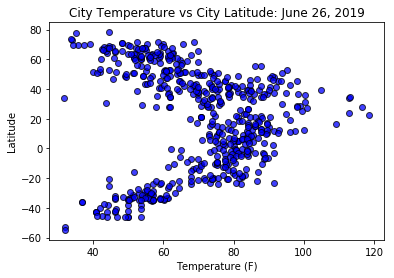

In [33]:
plt.scatter(temp, lat, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Temperature vs City Latitude: June 26, 2019")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.savefig("WeatherPy/citytemp.png")

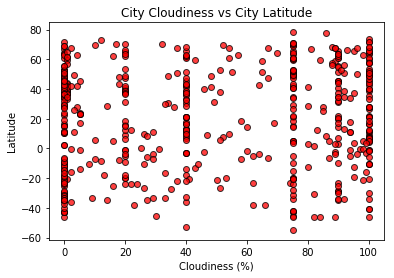

In [30]:
plt.scatter(clouds, lat, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Cloudiness vs City Latitude: June 26, 2019")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.savefig("WeatherPy/citycloudiness.png")

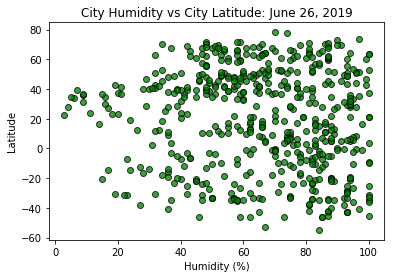

In [34]:
plt.scatter(humid, lat, marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("City Humidity vs City Latitude: June 26, 2019")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.savefig("WeatherPy/cityhumidity.png")

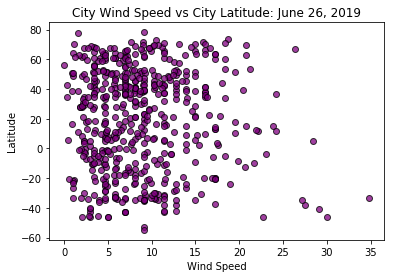

In [35]:
plt.scatter(wind, lat, marker="o", facecolors="purple", edgecolors="black", alpha=0.75)
plt.title("City Wind Speed vs City Latitude: June 26, 2019")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.savefig("WeatherPy/citywind.png")